In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import *
from analysis import *
from model import *

In [40]:
oiii = for_oiii()
oiii_ = oiii[oiii["loglbol"] > 46]
oiii_res = np.loadtxt("../output/oiii.res")

cond_oiii = (oiii_res[:,3] > -0.5) & (oiii_res[:,-2] < 50)
oiii_ = oiii_[cond_oiii]
oiii_res = oiii_res[cond_oiii]

oiii_ans = np.array([analysis(i) for i in oiii_res])

In [4]:
oiii = for_oiii()
oiii_ = oiii[oiii["loglbol"] > 46]
oiii_res = np.loadtxt("../output/oiii_single_dust.res")

cond_oiii = (oiii_res[:,3] > -0.5) & (oiii_res[:,-2] < 50)
oiii_ = oiii_[cond_oiii]
oiii_res = oiii_res[cond_oiii]

oiii_ans = np.array([analysis(i) for i in oiii_res])

initial: 105783
select redshift: 19083
select wise: 15666


In [5]:
import pickle
f = open("../res/oiii_sgd.bfsim", "wb")
pickle.dump({
    "data": oiii_,
    "res": oiii_res,
    "ans": oiii_ans
},f)
f.close()

In [6]:
def analysis_(params_, up):
    optic, nir = components(params_)

    loglbol = np.log10(5 * optic(0.3))
    loglnirs = np.log10(nir(np.linspace(1,up)))
    logcfs = loglnirs - loglbol

    return logcfs

In [8]:
logbh = oiii_["logbh_hb_vp06"]

In [9]:
cors_sim_sgd = []
sims = []
for i in range(100):
    sims.append(np.loadtxt(f"../_temp/-0.2/oiii{i}.sim"))
for sim in sims:
    sim_ans = np.array([analysis_(i, 12) for i in sim[:,:-1]])
    sim_logew = sim[:,-1]
    sim_loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + sim[:,0]
    sim_cors = [parcor([sim_logew, sim_ans[:,i], sim_loglbol, logbh])[0,1]
                for i in range(50)]
    cors_sim_sgd.append(sim_cors)

In [14]:
np.savetxt("cors_sim_sgd", [np.mean(cors_sim_sgd, axis=0), np.std(cors_sim_sgd, axis=0)])

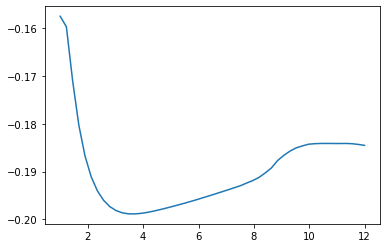

In [13]:
plt.plot(np.linspace(1,12), np.mean(cors_sim_sgd, axis=0))

In [18]:
logew = np.log10(oiii_["ew_oiii_5007"])
logcf = oiii_ans[:, -1]
logbh = oiii_["logbh_hb_vp06"]
loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + oiii_res[:,0]

In [16]:
oiii_res_sgd = np.loadtxt("../output/oiii_single_dust.res")

In [19]:
oiii_res_sgd = oiii_res_sgd[cond_oiii]

logcfs_sgd = np.array([analysis_(i, 12) for i in oiii_res_sgd])
cors_sgd = [parcor([logew, logcfs_sgd[:,i], loglbol, logbh])[0,1] for i in range(50)]

In [22]:
def single_bootstrap_sgd():
    ind = np.random.choice(np.arange(len(oiii_)), len(oiii_))

    return [parcor([logew[ind], logcfs_sgd[ind,i], loglbol[ind], logbh[ind]])[0,1] for i in range(50)]

In [23]:
cors_sgd_std = np.std([single_bootstrap_sgd() for i in range(1000)], axis=0)

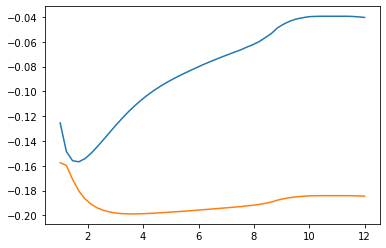

In [21]:
plt.plot(np.linspace(1,12), cors_sgd)
plt.plot(np.linspace(1,12), np.mean(cors_sim_sgd, axis=0))

In [24]:
def plot_with_err(x, y, err, ax=plt, **kwargs):
    line, = ax.plot(x, y, **kwargs)
    error = ax.fill_between(x, y + err, y - err, **kwargs, alpha=0.2)
    return line, error

In [31]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 16
})

In [34]:
from matplotlib import cm

color = cm.get_cmap("RdPu")

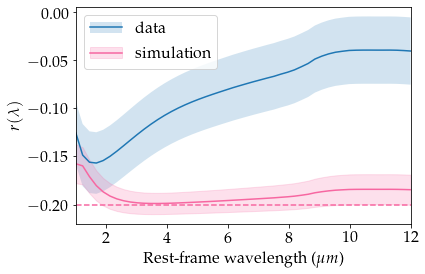

In [43]:
xx = np.linspace(1,12)
a = plot_with_err(xx, cors_sgd, cors_sgd_std)

b = plot_with_err(xx, np.mean(cors_sim_sgd, axis=0), np.std(cors_sim_sgd, axis=0), color=color(0.5))

plt.legend([a, b], ["data", "simulation"])

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("$r(\lambda)$")
plt.xticks([2,4,6,8,10,12])

plt.axhline(-0.2, color=color(0.5), linestyle="--")
plt.xlim((1,12))

plt.savefig("/Users/wul/Desktop/sgd1.pdf", bbox_inches="tight")

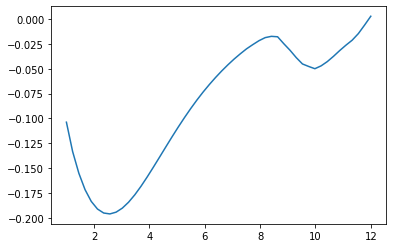

In [60]:
up = 12

oiii_ans_ = np.array([analysis_(i, up) for i in oiii_res])
oiii_loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + oiii_res[:,0]

oiii_cors = [parcor([np.log10(oiii_["ew_oiii_5007"]), oiii_ans_[:,i], oiii_loglbol, oiii_["logbh_hb_vp06"]])[0,1]
for i in range(len(oiii_ans_[0,:]))]

x = np.linspace(1,up)
plt.plot(x, oiii_cors)

In [61]:
oiii = for_oiii(ir = 15)
oiii_ = oiii[oiii["loglbol"] > 46]
oiii_res = np.loadtxt("../output/oiii15.res")

cond_oiii = (oiii_res[:,3] > -0.5) & (oiii_res[:,-2] < 50)
oiii_ = oiii_[cond_oiii]
oiii_res = oiii_res[cond_oiii]

oiii_ans = np.array([analysis(i) for i in oiii_res])

TypeError: for_oiii() got an unexpected keyword argument 'ir'